## MLP

An MLP (Multi-Layer Perceptron) is a type of feedforward artificial neural network consisting of multiple layers of interconnected neurons, including an input layer, one or more hidden layers, and an output layer. It can be used for tasks like classification and regression and is trained using supervised learning algorithms like backpropagation.

![My Image](800px-MultiLayerPerceptron.png)


### Forward Propagation

Given an input vector $x$ and a feedforward neural network with $L$ layers:

Set $a^{(0)} = x.$

1. For each layer $l$ from $1$ to $L-1$:

    a. Compute: $z^{(l)} = W^{(l)} . a^{(l-1)} + b^{(l)}$
    
    b. Compute: $a^{(l)} = f(z^{(l)})$
    

2. For the output layer $L$:

    a. Compute: $z^{(L)} = W^{(L)} * a^{(L-1)} + b^{(L)}$
    
    b. Compute: $\hat{y} = g(z^{(L)})$

Here, $W^{(l)}$ and $b^{(l)}$ are the weight matrix and bias vector for layer $l$, and $f$ and $g$ are the activation functions.

### Loss Function

For regression tasks, the Mean Squared Error (MSE) loss function is commonly used:

$$L(y, \hat{y}) = \frac{1}{N} \sum_i (y_i - \hat{y}_i)^2$$

For classification tasks, the Cross-Entropy loss function is commonly used:

$$L(y, \hat{y}) = -\frac{1}{N} \sum_i \sum_j y_{ij} * log(\hat{y}_{ij})$$

Here, $y$ is the true label vector or matrix, $\hat{y}$ is the predicted label vector or matrix, $N$ is the number of samples, and $i$ and $j$ are indices for samples and classes, respectively.


### Backpropagation

#### Algorithm

Given a neural network with $L$ layers and a loss function $L_{loss}(y, \hat{y})$, the backpropagation algorithm proceeds as follows:

1. Perform forward propagation to compute activations $a^{(l)}$ and pre-activations $z^{(l)}$ for each layer $l$.


2. Compute the gradient of the loss function with respect to the pre-activations of the output layer:

    -- For regression tasks (e.g., using Mean Squared Error loss): 
    
    $$\delta^{(L_{loss})} = -2 * (y - a^{(L)}) ⊙ f'(z^{(L)})$$

    -- For classification tasks (e.g., using Cross-Entropy loss and softmax activation): 
    
    $$\delta^{(L_{loss})} = a^{(L)} - y$$


3. For each layer l from L-1 to 1:

    a. Compute the gradient of the loss function with respect to the pre-activations of layer $l$:
    
     $$\delta^{(l)} = (W^{(l+1)})^T * \delta^{(l+1)} ⊙ f'(z^{(l)})$$

    b. Compute the gradients of the loss function with respect to the weights and biases of each layer:

    $$\triangledown{W^{(l)}} L_{loss} = \delta^{(l)} * (a^{(l-1)})^T$$
    $$\triangledown{b^{(l)}} L_{loss} = \delta^{(l)}$$
    
4. Update the weights and biases using gradient descent or an optimization algorithm:

    $$W^{(l)} = W^{(l)} - \alpha * \triangledown W^{(l)} L_{loss}$$
    $$b^{(l)} = b^{(l)} - \alpha * \triangledown b^{(l)} L_{loss}$$


The forward propagation, backpropagation, and weight update steps are iteratively performed until convergence or a predefined number of iterations is reached. Note that $f'(z^{(l)})$ denotes the element-wise derivative of the activation function with respect to its input, and ⊙ represents the element-wise (Hadamard) product.

#### Derivation

Let $L(y, \hat{y})$ be the loss function, and let $a^{(l)} = f(z^{(l)})$ be the activations of layer $l$, where $f$ is the activation function and $z^{(l)} = W^{(l)} \cdot a^{(l-1)} + b^{(l)}$ are the pre-activations.

We want to compute the gradient of the loss function with respect to the weights of layer $l$:

$$\triangledown W^{(l)} L = \frac{\partial L}{\partial W^{(l)}}$$

To do this, we'll apply the chain rule, which states that the derivative of a composite function is the product of the derivatives of the functions involved:

$$\frac{\partial L}{\partial W^{(l)}} = \frac{\partial L}{\partial z^{(l)}} \cdot \frac{\partial z^{(l)}}{\partial W^{(l)}}$$

First, let's compute the derivative of the pre-activations with respect to the weights:

$$\frac{\partial z^{(l)}_i}{\partial W^{(l)}_{ij}} = a^{(l-1)}_j$$

Here, $i$ and $j$ are indices for neurons in layer $l$ and layer $l-1$, respectively.

Now, we need to compute the derivative of the loss function with respect to the pre-activations:

$$\frac{\partial L}{\partial z^{(l)}_i} = \sum_k \frac{\partial L}{\partial z^{(l+1)}_k} \cdot \frac{\partial z^{(l+1)}_k}{\partial z^{(l)}_i}$$

Here, $k$ is an index for neurons in layer $l+1$, and we apply the chain rule again.

We can rewrite the above expression as:

$$\frac{\partial L}{\partial z^{(l)}_i} = \sum_k \delta^{(l+1)}_k \cdot \frac{\partial(W^{(l+1)}_{ki} \cdot a^{(l)}_i + b^{(l+1)}_k)}{\partial z^{(l)}_i}$$

Since only $a^{(l)}_i$ depends on $z^{(l)}_i$, the derivative simplifies to:

$$\frac{\partial L}{\partial z^{(l)}_i} = \sum_k \delta^{(l+1)}_k \cdot W^{(l+1)}_{ki} \cdot \frac{\partial a^{(l)}_i}{\partial z^{(l)}_i}$$

Now, we can express the derivative of the activation function as:

$$\frac{\partial a^{(l)}_i}{\partial z^{(l)}_i} =f^\prime(z^{(l)}_i)$$

Putting everything together, we have:

$$\frac{\partial L}{\partial z^{(l)}_i} = \sum_k \delta^{(l+1)}_k \cdot W^{(l+1)}_{ki} \cdot f^\prime (z^{(l)}_i)$$

Let's denote $\delta^{(l)}_i = \frac{\partial L}{\partial z^{(l)}_i}$, so we can write:

$$\delta^{(l)}_i = \sum_k \delta^{(l+1)}_k \cdot W^{(l+1)}_{ki} \cdot f^\prime(z^{(l)}_i)$$

Finally, we can express the gradient of the loss function with respect to the weights as:

$$\triangledown W^{(l)} L = \delta^{(l)} \cdot (a^{(l-1)})^T$$

By applying the chain rule, we've derived the expression for the gradient of the loss function with respect to the weights of layer $l$, which is essential for the backpropagation algorithm.

#### XOR function

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

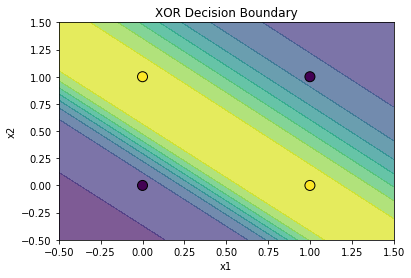

In [3]:
# XOR input-output pairs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the 3-layer MLP
model = Sequential()
model.add(Dense(2, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Create a grid for the decision boundary
grid_size = 100
x_range = np.linspace(-0.5, 1.5, grid_size)
y_range = np.linspace(-0.5, 1.5, grid_size)
grid_x, grid_y = np.meshgrid(x_range, y_range)
grid = np.c_[grid_x.ravel(), grid_y.ravel()]

# Predict the grid values using the trained model
predictions = model.predict(grid)
predictions = predictions.reshape(grid_x.shape)

# Plot the decision boundary
plt.contourf(grid_x, grid_y, predictions, cmap='viridis', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='viridis', edgecolors='k', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Decision Boundary')
plt.show()

#### MNIST

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2261 - accuracy: 0.9344 - val_loss: 0.0981 - val_accuracy: 0.9680
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9748 - val_loss: 0.0717 - val_accuracy: 0.9789
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0502 - accuracy: 0.9840 - val_loss: 0.0698 - val_accuracy: 0.9777
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0710 - val_accuracy: 0.9800
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0690 - val_accuracy: 0.9784
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.0702 - val_accuracy: 0.9793
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0171 - 

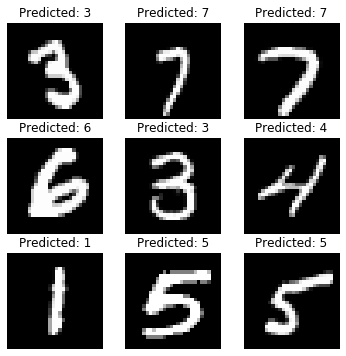

In [5]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the MLP model
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Visualize sample images and their predicted labels
num_samples = 9
random_indices = np.random.randint(0, len(X_test), num_samples)
predictions = model.predict(X_test[random_indices])

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[random_indices[i]].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(predictions[i])}")
    ax.axis('off')

plt.show()